<a href="https://colab.research.google.com/github/dajley/Analyzing-Outliers/blob/main/ZScore_Method_on_Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from scipy import stats

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Datasets/Combined County Data Cleansed.csv')

# Copy of original DataFrame
df_zscore = df.copy()

# Columns to apply Modified Z-Score
mod_zscore_columns = ['Avg Wind Speed', 'Avg Max Wind Speed', 'Total Rainfall']

# Column to apply Standard Z-Score
zscore_column = 'Avg Dew Point'

# Function to compute MAD
def calculate_mad(series):
    return np.median(np.abs(series - np.median(series)))

# --- Modified Z-Score Outlier Handling ---
for col in mod_zscore_columns:
    median = df_zscore[col].median()
    mad = calculate_mad(df_zscore[col])

    if mad == 0:
        print(f"Skipping {col} (MAD = 0)")
        continue

    mod_z_score = 0.6745 * (df_zscore[col] - df_zscore[col].mean()) / mad
    outlier_mask = (mod_z_score > 3) | (mod_z_score < -3)

    outlier_count = outlier_mask.sum()
    df_zscore.loc[outlier_mask, col] = median
    print(f"[Modified Z] Replaced {outlier_count} outliers in '{col}' with median.")

# --- Standard Z-Score Outlier Handling ---
z_scores = np.abs(stats.zscore(df_zscore[zscore_column]))
z_outlier_mask = z_scores > 3

median_z_col = df_zscore[zscore_column].median()
df_zscore.loc[z_outlier_mask, zscore_column] = median_z_col

print(f"[Standard Z] Replaced {z_outlier_mask.sum()} outliers in '{zscore_column}' with median.")

# --- Save cleaned DataFrame ---
df_zscore.to_csv('df_zscore.csv', index=False)
print("Cleaned dataset saved as 'df_zscore.csv'")


[Modified Z] Replaced 2 outliers in 'Avg Wind Speed' with median.
[Modified Z] Replaced 4 outliers in 'Avg Max Wind Speed' with median.
[Modified Z] Replaced 1 outliers in 'Total Rainfall' with median.
[Standard Z] Replaced 0 outliers in 'Avg Dew Point' with median.
Cleaned dataset saved as 'df_zscore.csv'


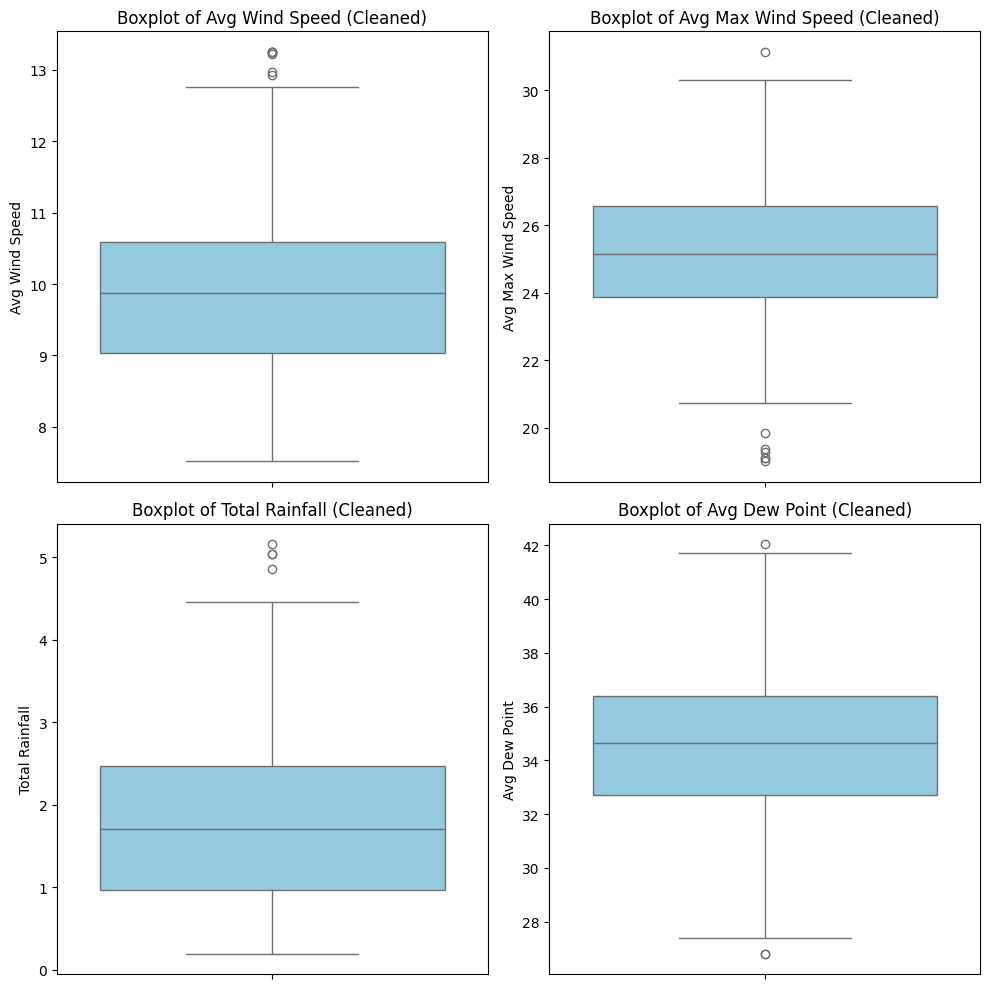

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Columns to plot
columns_to_plot = ['Avg Wind Speed', 'Avg Max Wind Speed', 'Total Rainfall', 'Avg Dew Point']

# Set up the plot grid
plt.figure(figsize=(10, 10))
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(2, 2, i)  # 2 rows, 2 columns
    sns.boxplot(y=df_zscore[col], color='skyblue')  # <-- vertical box
    plt.title(f'Boxplot of {col} (Cleaned)')
    plt.ylabel(col)

plt.tight_layout()
plt.show()



In [7]:
# Access multiple values by integer position using .iloc
print(df['Avg Wind Speed'].iloc[[83, 92]])

83    14.4415
92    14.1025
Name: Avg Wind Speed, dtype: float64


In [6]:
print(df_zscore['Avg Wind Speed'].iloc[[83, 92]])

83    9.8715
92    9.8715
Name: Avg Wind Speed, dtype: float64


In [9]:
print(df['Avg Max Wind Speed'].iloc[[83, 122, 146, 177]])

83     31.8685
122    18.3790
146    36.0010
177    36.0010
Name: Avg Max Wind Speed, dtype: float64


In [10]:
print(df_zscore['Avg Max Wind Speed'].iloc[[83, 122, 146, 177]])

83     25.14925
122    25.14925
146    25.14925
177    25.14925
Name: Avg Max Wind Speed, dtype: float64


In [11]:
print(df['Total Rainfall'].iloc[[216]])

216    6.1945
Name: Total Rainfall, dtype: float64


In [12]:
print(df_zscore['Total Rainfall'].iloc[[216]])

216    1.70725
Name: Total Rainfall, dtype: float64


In [14]:
print(df['Avg Dew Point'].iloc[[]])

Series([], Name: Avg Dew Point, dtype: float64)


In [15]:
print(df_zscore['Avg Dew Point'].iloc[[]])

Series([], Name: Avg Dew Point, dtype: float64)
